# Manipulating fermionic operators

Before we see how to use a CTQMC impurity solver, it will be useful to learn about operators. Indeed, one of the
inputs of the CTQMC solver is a Hamiltonian in operator form.

## Fundamental operators

After importing the operator module, the keyword `c_dag` and `c` allow to define a new fermionic
operator. `c_dag` and `c` are followed by two indices. Inspired by the block structure of Green's functions,
the first index is a block index, while the second is the index within the block. Here's an example
of operators as they would be defined if we had two blocks *up* and *down* of size 1:

In [1]:
from triqs.operators import c, c_dag, n, Operator # n and Operator will be needed later
print(c_dag('up',0))
print(c('up',0))
print(c_dag('down',0))
print(c('down',0))

1*c_dag('up',0)
1*c('up',0)
1*c_dag('down',0)
1*c('down',0)


## Number operator

The keyword `n` is defined as $C^\dagger C$

In [2]:
print(n('up',0))

1*c_dag('up',0)*c('up',0)


## Operations with operators

Operators can be manipulated and anti-commutation relations will be used to simplify
expressions

In [3]:
# Should give 0
print(n('up',0) - c_dag('up',0)*c('up',0))

0


In [4]:
# Some calculation
print(n('up',0) - 2 * c_dag('up',0)*c('up',0))

-1*c_dag('up',0)*c('up',0)


In [5]:
# Define the parameters
U = 4
mu = 3

# H is an empty operator
H = Operator()

# Add elements to define a Hamiltonian
H += U * n('up',0) * n('down',0)
H -= mu * (n('up',0) + n('down',0))
print(H)

-3*c_dag('down',0)*c('down',0) + -3*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)


## Exact Diagonalization

For small system-sizes we can use `AtomDiag` provided by TRIQS to perform exact diagonalization on the Hamiltonian

In [1]:
from triqs.atom_diag import AtomDiag
?AtomDiag

Signature: AtomDiag(*args, **kwargs)
Docstring:
Lightweight exact diagonalization solver

Use the QR algorithm to diagonalize the Hamiltonian.
Auto-partitions the Hamiltonian into subspaces (blocks)
such that all creation and annihilation operators map one
subspace to exactly one other subspace.

Parameters
----------
h: Operator
    Hamiltonian to be diagonalized.
fops: list of tuple of strings and ints
    List of all annihilation / creation operator flavors (indices).
    Must at least contain all flavors met in `h`.
qn_vector: list of Operator, optional
    Vector of quantum number operators to be used for the auto-partitioning
n_min, n_max: integers, optional
    Truncate the Fock-space to states with particle number in [n_min, n_max]
    Cannot be combined with qn_vector
File:      ~/opt/triqs/lib/python3.11/site-packages/triqs/atom_diag/__init__.py
Type:      function

In [7]:
# List of operator flavors
fops = [('up',0), ('down',0)]

# Construct AtomDiag object, Performs diagonalization
AD = AtomDiag(h=H, fops=fops)

print(AD.gs_energy)

-3.0


We can then use the `AtomDiag` object to obtain for example the atomic Green's functions

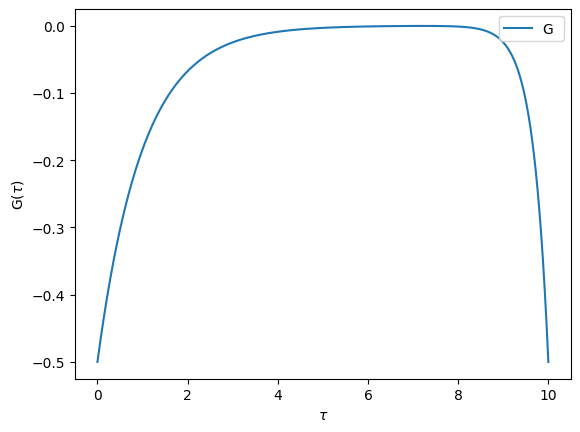

In [8]:
from triqs.atom_diag import atomic_g_tau
Gtau = atomic_g_tau(atom=AD, beta=10, gf_struct=[('up',1),('down',1)], n_tau=1001)

from triqs.plot.mpl_interface import oplot
%matplotlib inline
oplot(Gtau["up"][0,0].real, name='G')